In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from __future__ import division

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import cProfile
import bayesian_changepoint_detection.offline_changepoint_detection as offcd
from functools import partial

In [27]:
def plotData(data):
    Q, P, Pcp = offcd.offline_changepoint_detection(data, partial(offcd.const_prior, l=(len(data)+1)), offcd.gaussian_obs_log_likelihood, truncate=-40)
    fig, ax = plt.subplots(figsize=[18, 16])
    ax = fig.add_subplot(2, 1, 1)
    ax.plot(data[:])
    ax = fig.add_subplot(2, 1, 2, sharex=ax)
    ax.plot(np.exp(Pcp).sum(0))

In [28]:
import json
import requests
import csv

data = np.array([], dtype=np.float64)

with open('btc_fivemin.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=';')
    for i,row in enumerate(readCSV):
        if i > 1000:break
        try:
            n = float(row[7])
            data = np.append(data, n)
        except:
            pass
    average = np.average(data)
    std = np.std(data)
    for i,d in enumerate(data):
        data[i] = (d-average)/std

In [24]:
plotData(data)

KeyboardInterrupt: 

In [29]:
import bayesian_changepoint_detection.online_changepoint_detection as oncd
from functools import partial
import matplotlib.cm as cm

In [30]:
R, maxes = oncd.online_changepoint_detection(data, partial(oncd.constant_hazard, 250), oncd.StudentT(0.1, .01, 1, 0))

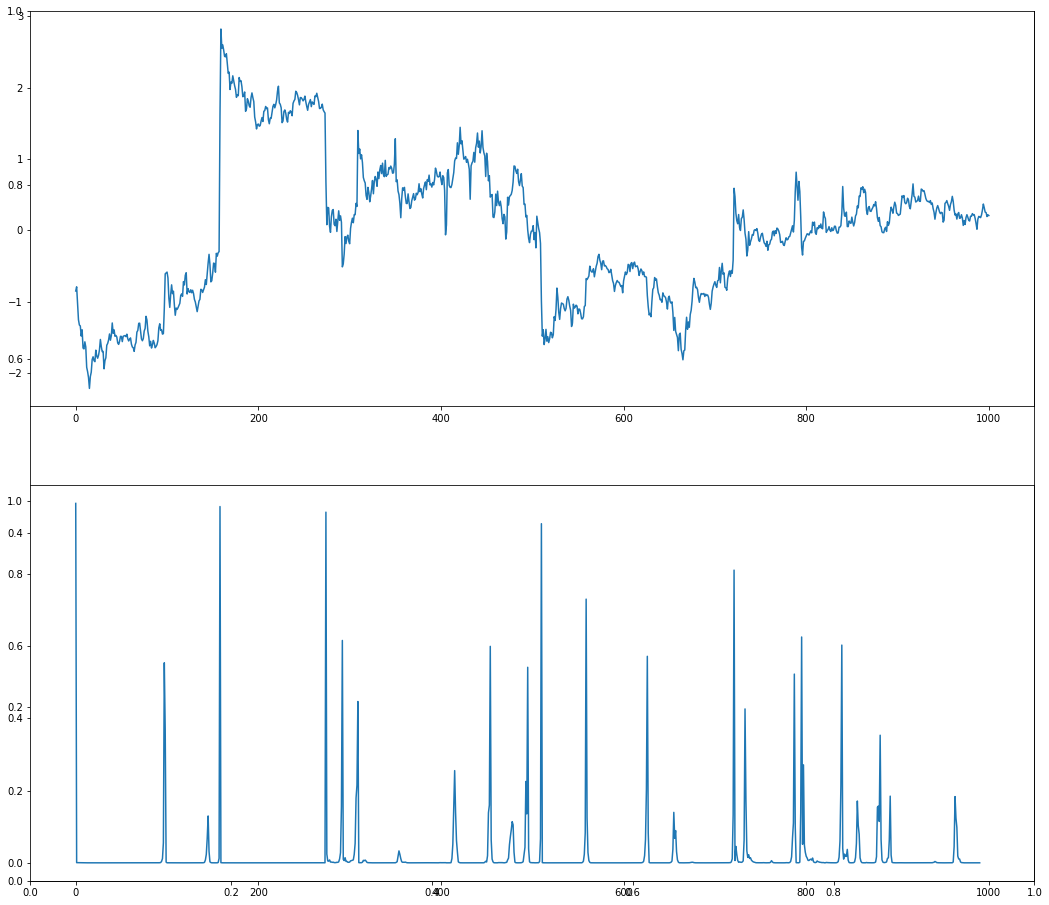

In [31]:
fig, ax = plt.subplots(figsize=[18, 16])
ax = fig.add_subplot(2, 1, 1)
ax.plot(data[:])
ax = fig.add_subplot(2, 1, 2, sharex=ax)
Nw=10;
ax.plot(R[Nw,Nw:-1])